In [1664]:
import numpy as np
from dataclasses import dataclass
import matplotlib.pyplot as plt

In [1665]:
INTERVAL_ = (0, 2)
k_ = 20 * 2
h_ = 0.1
N_ = 9
n_ = 52

def function_(tau): 
    return 2 * (54 - n_) * np.sin(np.pi * tau) * np.sqrt(1 + 2 * N_ * (tau - 0.5)**2 + N_**2)

In [1666]:
@dataclass
class Point:
    x: int
    y: int

    def __str__(self) -> str:
        return f'(x: {self.x}, y: {self.y})'
    
    def __round__(self, ndigits=0):
        rounded_x = round(self.x, ndigits)
        rounded_y = round(self.y, ndigits)
        return Point(rounded_x, rounded_y)

In [1667]:
def decorate_plot(ax, x_ticks, xname, yname, loc=(-0.025, -0.3)):
    # Define font sizes
    SIZE_TICKS = 10

    # Move left y-axis and bottom x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # axis names
    ax.set_ylabel(xname, loc='top', rotation=0, fontsize=15)
    ax.yaxis.set_label_coords(0.45, 0.95)

    ax.set_xlabel(yname, loc='right', fontsize=15, labelpad=-5)

    # k_ticks = k - (k % 10)
    # h_ticks = (b - a) / k_ticks
    # x_ticks = [a + i * h_ticks for i in range(k_ticks + 1)]
    ax.set_xticks(x_ticks)

    # Adjust the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    plt.gca().spines['bottom'].set_position(('data',0))

    # plt.legend(fontsize=10, loc='lower left')
    plt.legend(fontsize=10, loc=loc)

    # Update font settings
    plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

    # Adjust layout
    plt.tight_layout()

In [1668]:
def Uniform_NET(k, func, a, b):
    h = (b - a) / (k)

    print(h)

    data = []
    for i in range(k + 1):
        x = a + i * h
        y = func(x)

        data.append(Point(x, y))
    return data

a_ = INTERVAL_[0]
b_ = INTERVAL_[1]
data_ = Uniform_NET(k_, function_, a_, b_)
for ind, point in enumerate(data_):
    print(f'\\item {round(point, 3)}')

0.05
\item (x: 0.0, y: 0.0)
\item (x: 0.05, y: 5.791)
\item (x: 0.1, y: 11.388)
\item (x: 0.15, y: 16.664)
\item (x: 0.2, y: 21.5)
\item (x: 0.25, y: 25.788)
\item (x: 0.3, y: 29.432)
\item (x: 0.35, y: 32.353)
\item (x: 0.4, y: 34.487)
\item (x: 0.45, y: 35.785)
\item (x: 0.5, y: 36.222)
\item (x: 0.55, y: 35.785)
\item (x: 0.6, y: 34.487)
\item (x: 0.65, y: 32.353)
\item (x: 0.7, y: 29.432)
\item (x: 0.75, y: 25.788)
\item (x: 0.8, y: 21.5)
\item (x: 0.85, y: 16.664)
\item (x: 0.9, y: 11.388)
\item (x: 0.95, y: 5.791)
\item (x: 1.0, y: 0.0)
\item (x: 1.05, y: -5.851)
\item (x: 1.1, y: -11.627)
\item (x: 1.15, y: -17.19)
\item (x: 1.2, y: -22.406)
\item (x: 1.25, y: -27.148)
\item (x: 1.3, y: -31.295)
\item (x: 1.35, y: -34.739)
\item (x: 1.4, y: -37.386)
\item (x: 1.45, y: -39.159)
\item (x: 1.5, y: -40.0)
\item (x: 1.55, y: -39.87)
\item (x: 1.6, y: -38.755)
\item (x: 1.65, y: -36.66)
\item (x: 1.7, y: -33.618)
\item (x: 1.75, y: -29.682)
\item (x: 1.8, y: -24.929)
\item (x: 1.85, y

In [1669]:
def buildBar(filename):
    # Define colors
    RED = '#6F1D1B'

    # Create the figure and axis
    _, ax = plt.subplots(figsize=(10, 6))

    # plot
    x_values = [point.x for point in data_]
    y_values = [point.y for point in data_]

    ax.scatter(x_values, y_values, color='blue', label=f'$\\text{{(равномерная сетка, {k_+1} узел)}}$')
    ax.plot(x_values, y_values, color=RED, linestyle='-', linewidth=1.5)

    # Call the decoration function
    decorate_plot(ax, np.arange(0, 2+0.1, 0.1), '$f (\\tau)$', '$\\tau$', loc=(0, 0))

    # Save the figure
    plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    # Show the plot
    plt.show()

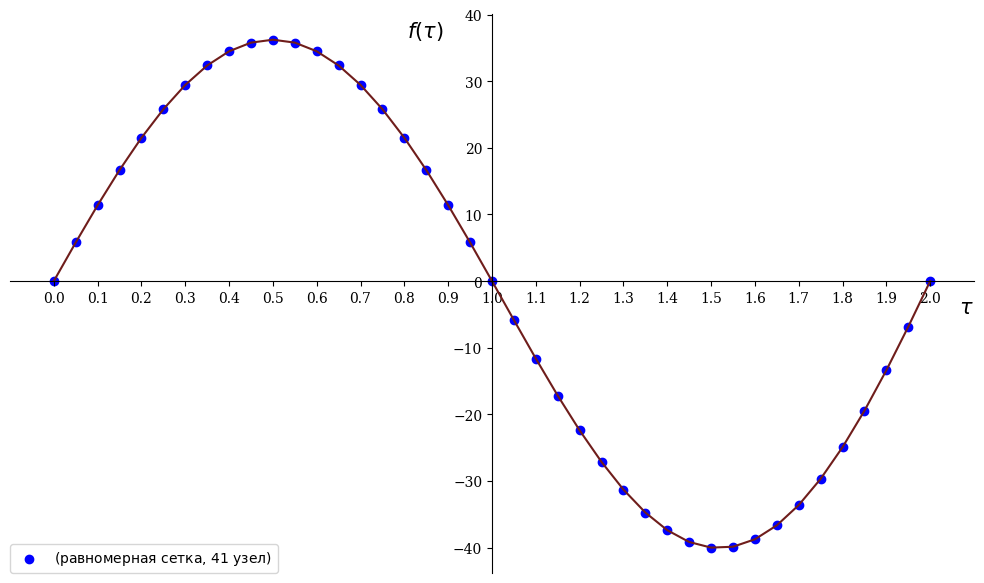

In [1670]:
buildBar('main_func_100')

In [1671]:
def cout(name, arr):
    res = []
    for el in arr:
        if el is not None:
            res.append(round(el, 5))
        else:
            res.append(None)
    print(f'{name}: {res}')

In [1672]:
X = [point.x for point in data_]
print(len(X))
print(f'X: {X}')


Y = [point.y for point in data_]
print(len(Y))
print(f'Y: {Y}')


H = [None for _ in range(k_+1)]
for i in range(1, k_+1):
    H[i] = X[i] - X[i-1]
print(len(H))
print(f'H: {H}')
cout('H', H)

A = [None for _ in range(k_+1)]
for i in range(1, k_+1):
    A[i] = Y[i-1]
print(len(A))
print(f'A: {A}')
cout('A', A)


G = [None for _ in range(k_+1)]
for i in range(1, k_):
    G[i] = (A[i+1]-A[i])/H[i]
print(len(G))
print(f'G: {G}')
cout('G', G)

41
X: [0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0, 1.05, 1.1, 1.1500000000000001, 1.2000000000000002, 1.25, 1.3, 1.35, 1.4000000000000001, 1.4500000000000002, 1.5, 1.55, 1.6, 1.6500000000000001, 1.7000000000000002, 1.75, 1.8, 1.85, 1.9000000000000001, 1.9500000000000002, 2.0]
41
Y: [0.0, 5.790864986788466, 11.387936605884127, 16.66386337695129, 21.499767241599038, 25.787593916455258, 29.432211710939516, 32.35323090081252, 34.48652103042384, 35.78540840951081, 36.22154055254967, 35.78540840951081, 34.48652103042384, 32.35323090081252, 29.432211710939516, 25.787593916455258, 21.499767241599045, 16.663863376951277, 11.38793660588413, 5.7908649867884705, 4.5559494501190544e-15, -5.851401837214935, -11.626926107171984, -17.189881318574134, -22.406262797863874, -27.14774392099645, -31.29463459623008, -34.73874354596566,

In [1673]:
MATRIX = np.zeros((k_-2, k_-2))
for i in range(1, k_-2 + 1):
    if i == 1:
        MATRIX[i-1, i-1] = 2 * (H[i] + H[i+1])
        MATRIX[i-1, i+1-1] = H[i+1]
    elif i == k_-2:
        MATRIX[i-1, i-1-1] = H[i]
        MATRIX[i-1, i-1] = 2 * (H[i] + H[i+1])
    else:
        MATRIX[i-1, i-1-1] = H[i]
        MATRIX[i-1, i-1] = 2 * (H[i] + H[i+1])
        MATRIX[i-1, i+1-1] = H[i+1]

print(MATRIX)


g_vector = np.zeros(k_-2)
for i in range(1, k_-2 + 1):
    g_vector[i-1] = 3 * (G[i+1] - G[i])

print(g_vector)


C = np.linalg.solve(MATRIX, g_vector)
C = [None] + [0] + list(C) + [0]
print(len(C))
print(f'C: {C}')
cout('C', C)

[[0.2  0.05 0.   ... 0.   0.   0.  ]
 [0.05 0.2  0.05 ... 0.   0.   0.  ]
 [0.   0.05 0.2  ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.2  0.05 0.  ]
 [0.   0.   0.   ... 0.05 0.2  0.05]
 [0.   0.   0.   ... 0.   0.05 0.2 ]]
[-11.62760206 -19.26869088 -26.40137439 -32.88463139 -38.59253282
 -43.41591628 -47.26374362 -50.06416503 -51.76531416 -52.33585716
 -51.76531416 -50.06416503 -47.26374362 -43.41591628 -38.59253282
 -32.88463139 -26.40137439 -19.26869088 -11.62760206  -3.63221103
   4.55265404  12.75414351  20.79442393  28.49402137  35.67542687
  42.16690353  47.80641974  52.44561914  55.95372621  58.22127821
  59.16356931  58.72369193  56.87506394  53.62333797  49.00760119
  43.10078966  36.00926078  27.87148925]
41
C: [None, 0, -42.22907222253813, -63.635752341213994, -88.60173604680327, -109.9847911748692, -129.151727003554, -145.25895725727355, -158.13076950085167, -167.4928370533436, -173.18118291499113, -175.08871454442334, -173.18110220058196, -167.49315991097774, -158.12

In [1674]:
B = [None for _ in range(k_+1)]
for i in range(1, k_):
    B[i] = G[i] - H[i]/3 * (2*C[i] + C[i+1])
B[k_] = B[k_ - 1] + H[k_ - 1] * (C[k_ - 1] + C[k_])
print(len(B))
print(f'B: {B}')
cout('B', B)


D = [None for _ in range(k_+1)]
for i in range(1, k_):
    D[i] = 1/(3*H[i]) * (C[i+1] - C[i])
D[k_] = 1/H[k_]**3 * (Y[k_] - A[k_] - B[k_] * H[k_] - C[k_]*H[k_]**2)
print(len(D))
print(f'D: {D}')
cout('D', D)

41
B: [None, 116.52111760614494, 114.40966399501804, 109.11642276683044, 101.50454834742956, 91.57522198634595, 79.61839607742479, 65.8978618643834, 50.728375526477144, 34.44719519876739, 17.413494200350655, -6.726200698636831e-07, -17.41349150987035, -34.44720461544835, -50.72834055023366, -65.89799235267631, -79.617909100497, -91.57703940576403, -101.49776564668532, -109.14173615038973, -114.3151931615242, -116.8736875565612, -116.72606605243547, -113.8376146640156, -108.2322441730535, -99.99361008528321, -89.2650716311534, -76.24841129207631, -61.201260698693616, -44.4332001406638, -26.30055408508541, -7.199853517674969, 12.43970257236174, 32.16562515933093, 51.50963995914043, 70.00641404789565, 87.17370480954916, 102.6387068324003, 115.71979882598903, 127.04047926707135, 132.55741553683137]
B: [None, 116.52112, 114.40966, 109.11642, 101.50455, 91.57522, 79.6184, 65.89786, 50.72838, 34.4472, 17.41349, -0.0, -17.41349, -34.4472, -50.72834, -65.89799, -79.61791, -91.57704, -101.49777,

In [1675]:
print(f'X (size: {len(X)}): {X}')
print(f'Y (size: {len(Y)}): {Y}')
print(f'A (size: {len(A)}): {A}')
print(f'B (size: {len(B)}): {B}')
print(f'C (size: {len(C)}): {C}')
print(f'D (size: {len(D)}): {D}')

X (size: 41): [0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0, 1.05, 1.1, 1.1500000000000001, 1.2000000000000002, 1.25, 1.3, 1.35, 1.4000000000000001, 1.4500000000000002, 1.5, 1.55, 1.6, 1.6500000000000001, 1.7000000000000002, 1.75, 1.8, 1.85, 1.9000000000000001, 1.9500000000000002, 2.0]
Y (size: 41): [0.0, 5.790864986788466, 11.387936605884127, 16.66386337695129, 21.499767241599038, 25.787593916455258, 29.432211710939516, 32.35323090081252, 34.48652103042384, 35.78540840951081, 36.22154055254967, 35.78540840951081, 34.48652103042384, 32.35323090081252, 29.432211710939516, 25.787593916455258, 21.499767241599045, 16.663863376951277, 11.38793660588413, 5.7908649867884705, 4.5559494501190544e-15, -5.851401837214935, -11.626926107171984, -17.189881318574134, -22.406262797863874, -27.14774392099645, -31.29463459623008, -34

In [1676]:
A = A[1:]
B = B[1:]
C = C[1:]
D = D[1:]
X = list(np.round(np.array(X),3))
# X = X[:-1]
# Y = Y[:-1]

# A = A[1:] + [A[-1]]
# B = B[1:] + [B[-1]]
# C = C[1:] + [C[-1]]
# D = D[1:] + [D[-1]]
# X = X
# Y = Y

print(f'X (size: {len(X)}): {X}')
print(f'Y (size: {len(Y)}): {Y}')
print(f'A (size: {len(A)}): {A}')
print(f'B (size: {len(B)}): {B}')
print(f'C (size: {len(C)}): {C}')
print(f'D (size: {len(D)}): {D}')

n = k_

def S(x):
    i = np.searchsorted(X, x) - 1

    if i < 0:
        i = 0
    elif i >= n:
        i = n - 1

    # print(i, x, X[i])

    dx = x - X[i]
    return A[i] + B[i] * dx + C[i] * dx**2 + D[i] * dx**3

S_vals = [S(x) for x in X]
print(len(S_vals))
print(f'S_vals: {S_vals}')


X (size: 41): [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 2.0]
Y (size: 41): [0.0, 5.790864986788466, 11.387936605884127, 16.66386337695129, 21.499767241599038, 25.787593916455258, 29.432211710939516, 32.35323090081252, 34.48652103042384, 35.78540840951081, 36.22154055254967, 35.78540840951081, 34.48652103042384, 32.35323090081252, 29.432211710939516, 25.787593916455258, 21.499767241599045, 16.663863376951277, 11.38793660588413, 5.7908649867884705, 4.5559494501190544e-15, -5.851401837214935, -11.626926107171984, -17.189881318574134, -22.406262797863874, -27.14774392099645, -31.29463459623008, -34.73874354596566, -37.38607883335533, -39.159320468406236, -40.0, -39.870324894796624, -38.75459030114828, -36.66012750864952, -33.61774698375181, -29.681644159311666, -24.92874798177694, -19.457505309892667, -13.38610829

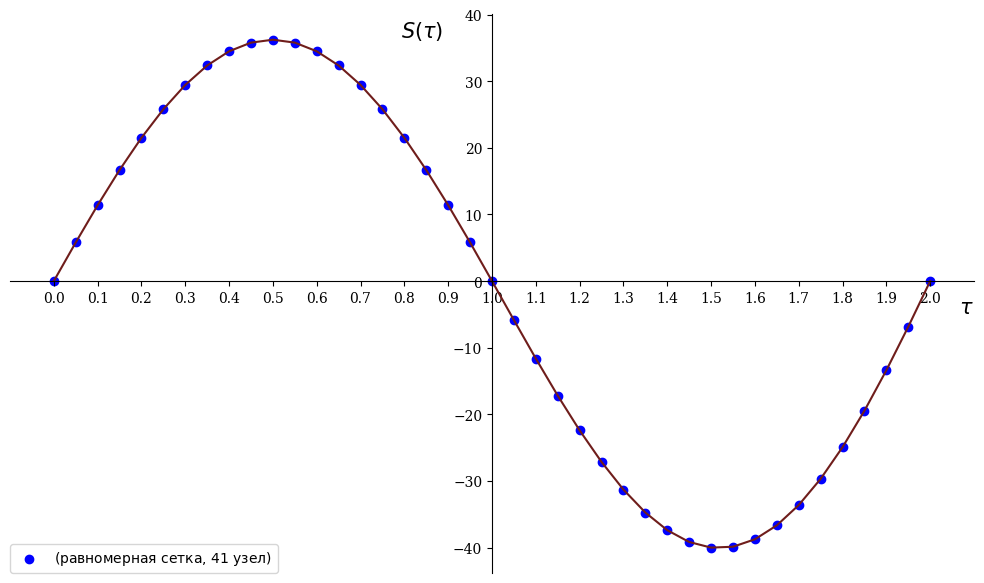

In [1677]:
def buildBar(filename):
    # Define colors
    RED = '#6F1D1B'

    # Create the figure and axis
    _, ax = plt.subplots(figsize=(10, 6))

    # plot
    x_values = X
    y_values = S_vals

    ax.scatter(x_values, y_values, color='blue', label=f'$\\text{{(равномерная сетка, {k_+1} узел)}}$')
    ax.plot(x_values, y_values, color=RED, linestyle='-', linewidth=1.5)

    # Call the decoration function
    decorate_plot(ax, np.arange(0, 2+0.1, 0.1), '$S (\\tau)$', '$\\tau$', loc=(0, 0))
    # Save the figure
    plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    # Show the plot
    plt.show()

buildBar('spline_100')

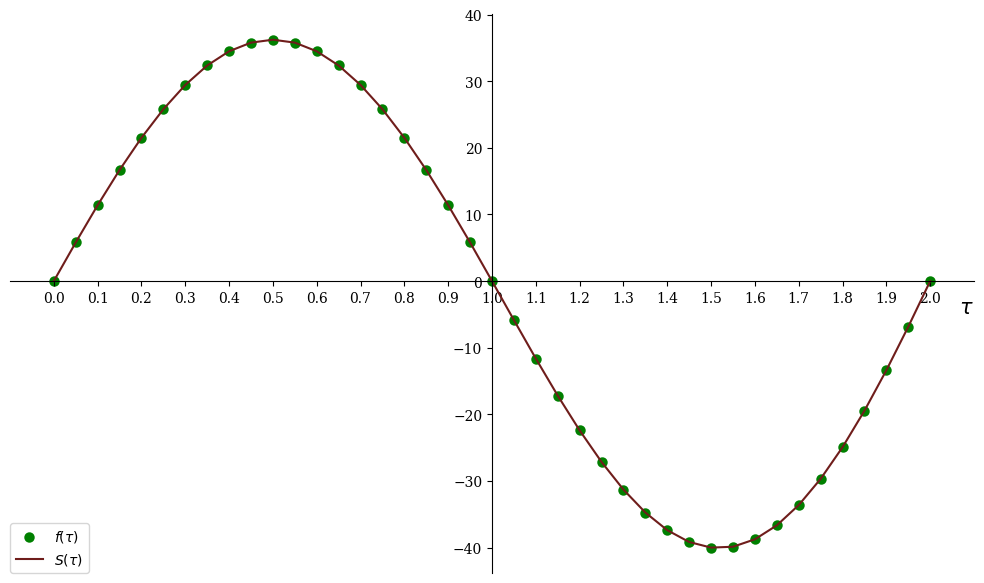

In [1678]:
def buildBar(filename):
    # Define colors
    RED = '#6F1D1B'

    # Create the figure and axis
    _, ax = plt.subplots(figsize=(10, 6))

    # main plot
    x_values = X
    y_values = Y

    # ax.scatter(x_values, y_values, color='blue', label=f'$\\text{{(равномерная сетка, {k} узлов)}}$')
    ax.scatter(x_values, y_values, color='green', linestyle='-', linewidth=1.5, label='$f(\\tau)$')

    # spline plot
    x_values = X
    y_values = S_vals

    # ax.scatter(x_values, y_values, color='blue', label=f'$\\text{{(равномерная сетка, {k} узлов)}}$')
    ax.plot(x_values, y_values, color=RED, linestyle='-', linewidth=1.5, label='$S(\\tau)$')

    # Call the decoration function
    decorate_plot(ax, np.arange(0, 2 + 0.1, 0.1), '', '$\\tau$', loc=(0, 0))
    # Save the figure
    plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    # Show the plot
    plt.show()

buildBar('main_x_spline_100')

In [1679]:
print(f'X (size: {len(X)}): {X}')
print(f'Y (size: {len(Y)}): {Y}')
print(f'S_vals: {S_vals}')

X (size: 41): [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 2.0]
Y (size: 41): [0.0, 5.790864986788466, 11.387936605884127, 16.66386337695129, 21.499767241599038, 25.787593916455258, 29.432211710939516, 32.35323090081252, 34.48652103042384, 35.78540840951081, 36.22154055254967, 35.78540840951081, 34.48652103042384, 32.35323090081252, 29.432211710939516, 25.787593916455258, 21.499767241599045, 16.663863376951277, 11.38793660588413, 5.7908649867884705, 4.5559494501190544e-15, -5.851401837214935, -11.626926107171984, -17.189881318574134, -22.406262797863874, -27.14774392099645, -31.29463459623008, -34.73874354596566, -37.38607883335533, -39.159320468406236, -40.0, -39.870324894796624, -38.75459030114828, -36.66012750864952, -33.61774698375181, -29.681644159311666, -24.92874798177694, -19.457505309892667, -13.38610829

In [1680]:
class CDM:
    def __init__(self, h):
        self.h = h
    
    def diff(self, f, x):
        numerator = f(x + self.h) - f(x - self.h)
        denominator = 2 * self.h

        return numerator / denominator

In [1681]:
cdm = CDM(h=1e-6)

Y_diff = [cdm.diff(function_, x) for x in X]
S_diff = [cdm.diff(S, x) for x in X]

print(f'Y_diff (size: {len(Y_diff)}): {Y_diff}')
print(f'S_diff (size: {len(S_diff)}): {S_diff}')

cout('Y', Y_diff)
cout('S', S_diff)

Y_diff (size: 41): [116.87400263131843, 114.31549058915635, 109.14201124112566, 101.49801436298844, 91.57725834718633, 79.61809547829546, 65.89814393898052, 50.72845567255513, 34.44728196200231, 17.4135305819334, 0.0, -17.4135305819334, -34.44728196555502, -50.72845567255513, -65.89814394786231, -79.61809547829546, -91.5772583525154, -101.49801436298844, -109.1420112393493, -114.31549059670587, -116.87400262258805, -116.72639343274227, -113.8379484224572, -108.23257782810458, -99.99393672543988, -89.2653839805746, -76.24870208111645, -61.20152212929497, -44.433426548806665, -26.30073313625303, -7.200000002427487, 12.439671884578729, 32.165423430541296, 51.51035626127509, 70.00399646983624, 87.1832811526474, 102.6038178437716, 115.85114414280895, 126.55170013076145, 134.38321813552534, 139.08423574002498]
S_diff (size: 41): [116.52111760586341, 114.40966399511865, 109.11642276667521, 101.5045483487853, 91.57522198499635, 79.61839607517618, 65.89786186417257, 50.72837552688725, 34.447195

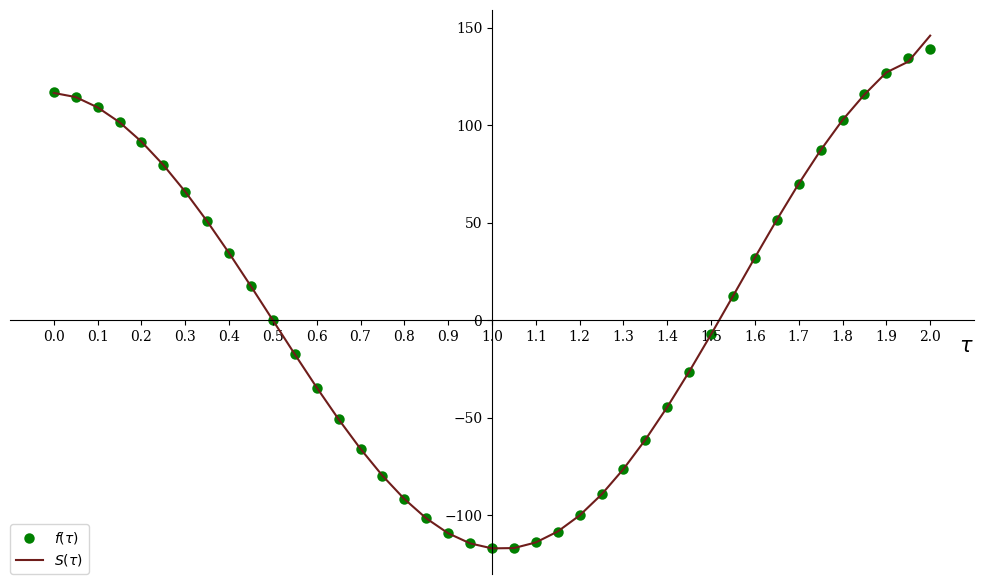

In [1682]:
def buildBar(filename):
    # Define colors
    RED = '#6F1D1B'

    # Create the figure and axis
    _, ax = plt.subplots(figsize=(10, 6))

    # main plot
    x_values = X
    y_values = Y_diff

    # ax.scatter(x_values, y_values, color='blue', label=f'$\\text{{(равномерная сетка, {k} узлов)}}$')
    ax.scatter(x_values, y_values, color='green', linestyle='-', linewidth=1.5, label='$f(\\tau)$')

    # spline plot
    x_values = X
    y_values = S_diff

    # ax.scatter(x_values, y_values, color='blue', label=f'$\\text{{(равномерная сетка, {k} узлов)}}$')
    ax.plot(x_values, y_values, color=RED, linestyle='-', linewidth=1.5, label='$S(\\tau)$')

    # Call the decoration function
    decorate_plot(ax, np.arange(0, 2 + 0.1, 0.1), '', '$\\tau$', loc=(0, 0))
    # Save the figure
    plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    # Show the plot
    plt.show()

buildBar('mainDiff_x_splineDiff_40')